Customer Segmentation Analysis 

In [50]:
#Importing necessary libraries

In [51]:
import numpy as np 
import pandas as pd 
import warnings
import sklearn_preprocessing
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

In [52]:
# Reading the data

In [53]:
data = pd.read_csv('C:/Users/bhara/Downloads/ifood_df.csv')

In [54]:
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [55]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [56]:
# Looking for missing values

In [57]:
data.isna().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [58]:
# Checking column types 

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [60]:
# Assessing unique values

In [61]:
data.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

Columns Z_CostContact and Z_Revenue have all the same values. These columns will not help us to understand our customers better. We can drop these columns from the data frame.

In [62]:
data.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

Customer Segmentation Analysis:

In [63]:
# Relevant features for clustering

features = ['Income', 'Recency', 'MntTotal', 'NumDealsPurchases', 'NumWebPurchases', 
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

In [64]:
x = data[features]

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
# Standardizing the data

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [67]:
from sklearn.cluster import KMeans

In [68]:
# Elbow method to determine optimal number of clusters

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    sse.append(kmeans.inertia_)

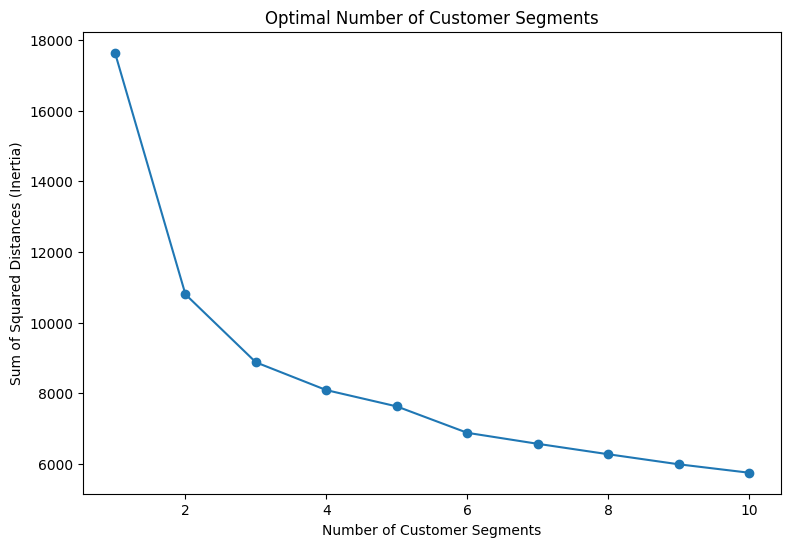

In [69]:
# Plotting the elbow curve

plt.figure(figsize=(9, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Optimal Number of Customer Segments')
plt.xlabel('Number of Customer Segments')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()

In [70]:
optimal_clusters = 3  # Assuming elbow is at 3 clusters

In [71]:
# Applying KMeans clustering

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(x_scaled)

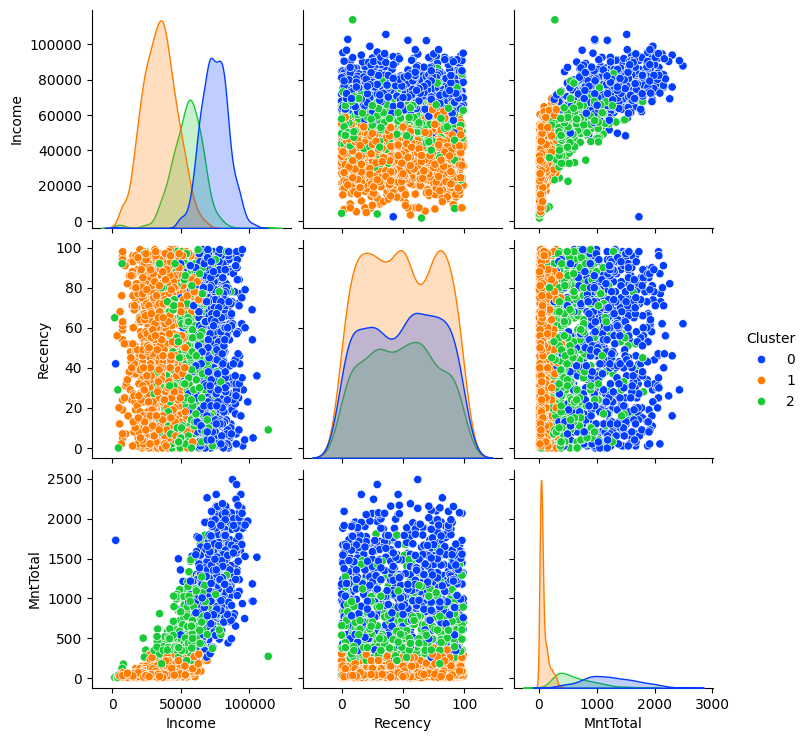

In [72]:
sns.pairplot(data, vars=['Income', 'Recency', 'MntTotal'], hue='Cluster', palette='bright')
plt.show()

In [73]:
# Analyzing the characteristics of each cluster

cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)

               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        74458.021866  0.036443  0.313411  49.653061  610.443149  59.290087   
1        34372.834835  0.752753  0.459459  48.849850   39.759760   5.081081   
2        54634.719231  0.380769  0.851923  48.465385  416.555769  23.980769   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0             401.453353        87.453353         61.395044     72.842566   
1              21.284284         7.534535          5.102102     15.881882   
2             130.486538        30.255769         24.238462     60.211538   

         ...  marital_Together  marital_Widow  education_2n Cycle  \
Cluster  ...                                                        
0        ...          0.258017       0.043732            0.074344   
1        ..

Scatter plot: Customer segments based on Income vs. Recency

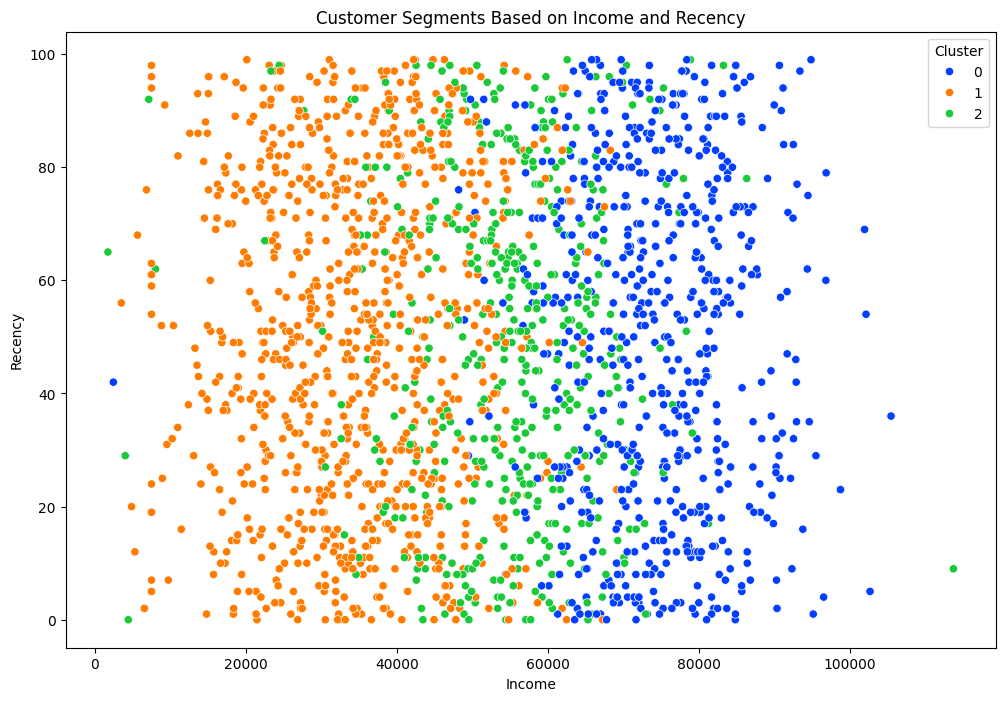

In [74]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Income', y='Recency', hue='Cluster', palette='bright')
plt.title('Customer Segments Based on Income and Recency')
plt.xlabel('Income')
plt.ylabel('Recency')
plt.show()

Customer segments based on Income vs. MntTotal (Total Amount Spent)

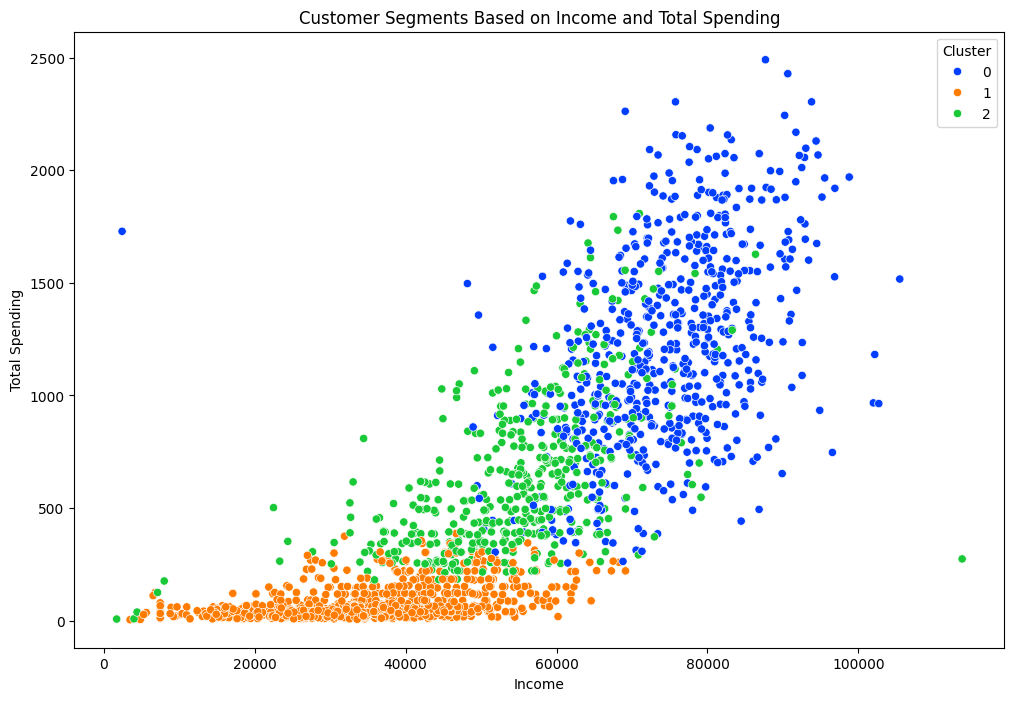

In [75]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Income', y='MntTotal', hue='Cluster', palette='bright')
plt.title('Customer Segments Based on Income and Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()

Bar chart: Comparing average total spending across clusters

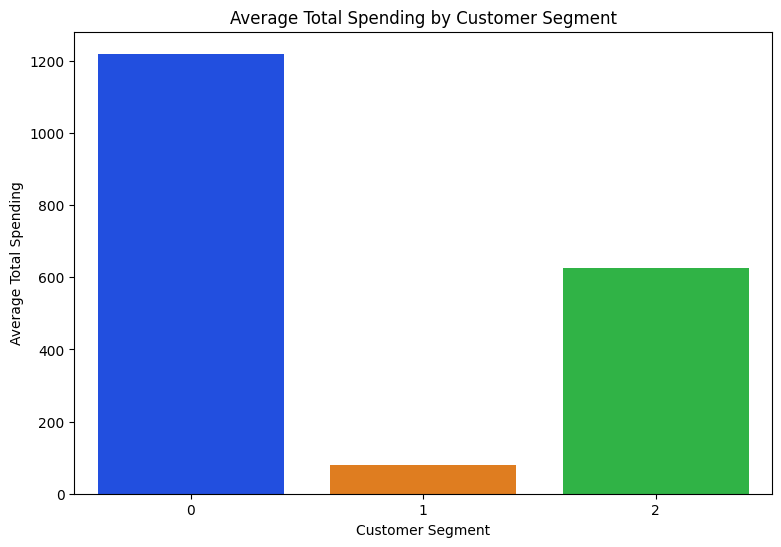

In [76]:
plt.figure(figsize=(9, 6))
cluster_summary = data.groupby('Cluster').mean()
sns.barplot(x=cluster_summary.index, y=cluster_summary['MntTotal'], palette='bright')
plt.title('Average Total Spending by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Total Spending')
plt.show()

Comparing average number of web purchases across clusters

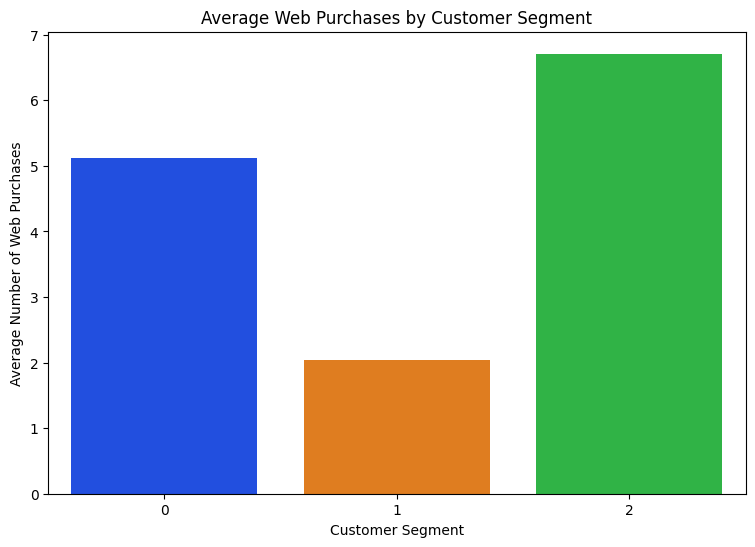

In [77]:
plt.figure(figsize=(9, 6))
sns.barplot(x=cluster_summary.index, y=cluster_summary['NumWebPurchases'], palette='bright')
plt.title('Average Web Purchases by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Number of Web Purchases')
plt.show()